<a href="https://colab.research.google.com/github/iolopezm/Analitica-de-Negocios/blob/main/Reto2_IOLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arboles de Decisión**
Cargar las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier



1. Se procede con la carga de los datos

In [ ]:
nxl='/content/sample_data/2. BD_Travel_Data_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)


XD=np.array(XDB[['College1','FoodSpend','Income','TravelSpend']])
yd=np.array(XDB[['CreditCard1']])
print (yd)

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


2. Creacion del modelo - Decision Tree

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)


VN=cm [0,0]
FP=cm [0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP)
print('La exactitud alcanzada por el modelo es:',Ex)
Se= VP/(FN+VP)
print('La sensibilidad alcanzada por el modelo fue:',Se)
Es=VN/(VN+FP)
print('La especificidad alcanzada por el modelo fue:',Es)

[[334   9]
 [ 42 115]]
La exactitud alcanzada por el modelo es: 0.898
La sensibilidad alcanzada por el modelo fue: 0.732484076433121
La especificidad alcanzada por el modelo fue: 0.9737609329446064


3. El árbol

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['College1','FoodSpend','Income','TravelSpend']
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

4. Se procede con el pronostico de las personas con las siguientes caracteristicas
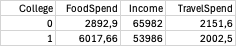

In [ ]:
XDB2=pd.read_excel(nxl,sheet_name=1)
XDB2=XDB2.dropna()
XDB2.head(100)

XD2=np.array(XDB2[['College','FoodSpend','Income','TravelSpend']])
print(XD2)


ydp2=mar.predict(XD2)
print(ydp2)

ydp2=mar.predict(XD2)
print(ydp2)
print('El numero de personas que van a utilizar tarjetas de crédito es:',np.sum(ydp2))
print('El numero total de datos es:',len(ydp2))
print('El numero de personas que no van a utilizar tarjetas de crédito es:',len(ydp2)-np.sum(ydp2))

[[0.00000e+00 2.89290e+03 6.59820e+04 2.15160e+03]
 [1.00000e+00 6.01766e+03 5.39860e+04 2.00250e+03]]
[0 0]
[0 0]
El numero de personas que van a utilizar tarjetas de crédito es: 0
El numero total de datos es: 2
El numero de personas que no van a utilizar tarjetas de crédito es: 2


**Análisis de Resultados**

Según la base de datos, se registran un total de 500 datos, de los cuales 343 corresponden a personas que utilizarán su tarjeta de crédito y 157 a personas que no, representando el 68,6% y el 31,4%, respectivamente.

El modelo de pronóstico alcanzó una exactitud cercana al 90%; pero estos valores no coinciden con la sensibilidad del 73%, que evalúa cómo el modelo clasifica a aquellos que viajarán con tarjeta de crédito, ni con la especificidad del 97%, que mide quienes no la usarán.

Se destacan tres Nodos Puros
[1,0]
[108,0]
[0,47].


Con respecto al pronóstico, se puede observar un total de 2 individuos, de los cuales nadie usará tarjeta de crédito.

**Respuestas Word**

Construir un modelo que permita predecir si un cliente utilizará la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos..

***•⁠  ⁠En el documento de Análisis en la Plataforma Google Colab, llevar a cabo la descripción de cada una de las variables que conforman el modelo.***

Al principio, las variables College y CreditCard estaban descritas con "yes" y "no", entonces se convirtieron en variables categoricas con valores "1" y "0" respectivamente.
Despues siguen las variables numericas donde se describe el: FoodSpend, Income, TravelSpend, de los individuos.

•⁠ ***Determinar las métricas de exactitud general, sensibilidad, especificidad.***


  - La exactitud alcanzada por el modelo es: 0.898
  - La sensibilidad alcanzada por el modelo fue: 0.732484076433121
  - La especificidad alcanzada por el modelo fue: 0.9737609329446064


•⁠  ⁠***De acuerdo con los nuevos clientes en la base de datos Travelan Score, Cuál es la probabilidad de que el primer cliente tenga planes de viajar el próximo año, y Cuál es la probabilidad para el segundo cliente.***

- La probabilidad del primer cliente es que 100% que no viaje con tarjeta de crédito.
- La probabilidad del segundo es 78,7% que no viaja con tarjeta de crédito.

⁠ ***Indicar las reglas del negocio a las que pertenecen los dos individuos anteriores.***

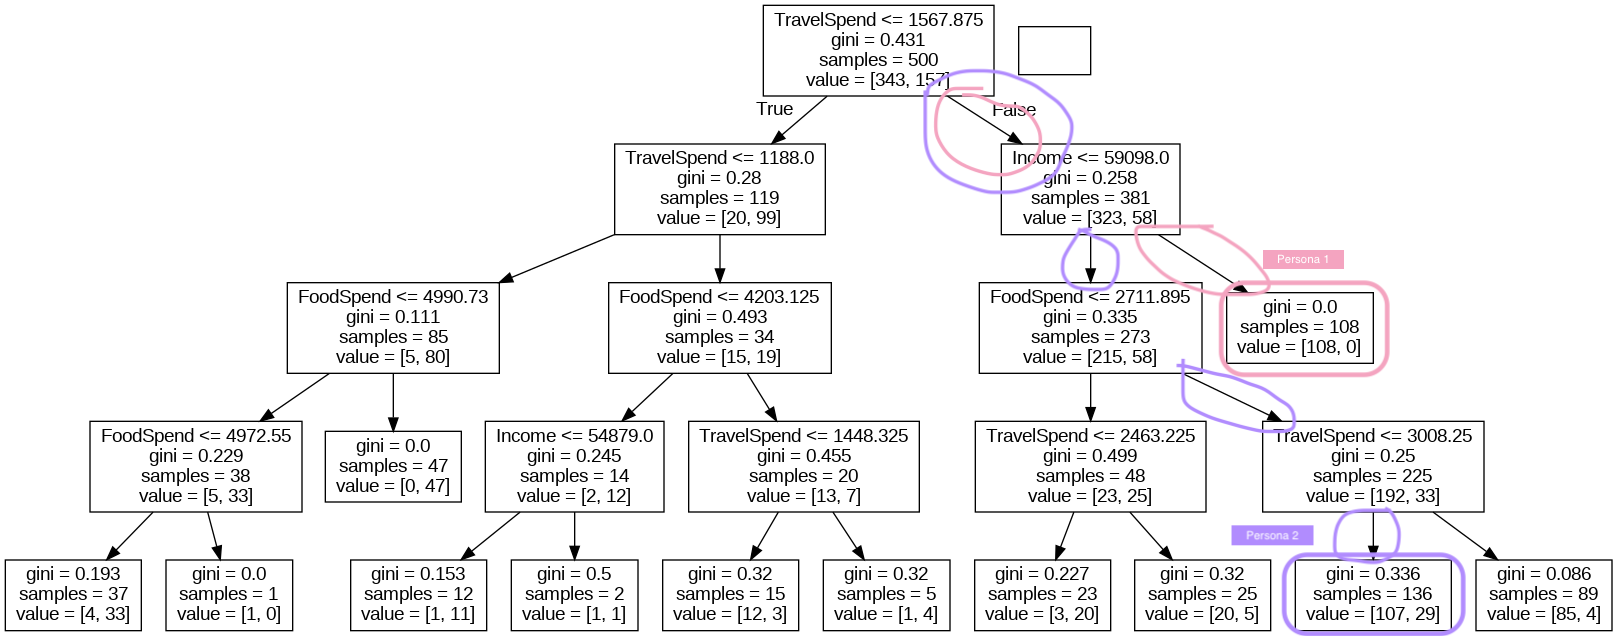

•⁠  ***⁠¿Indicar cuáles son las reglas que poseen nodos puros?***

[1,0] [108,0] [0,47].

•⁠  ***⁠Determinar las reglas para los nuevos clientes.***

Si el resultado es "0", indica que no utilizará la tarjeta. Si el resultado es "1", indica que se utilizará. Para los dos individuos con características específicas, ninguno usará la tarjeta, ya que ambos obtuvieron un valor de "0".